The haar wavelet with SALT. It is less exciting because the haar wavelet is easier to fit see (https://en.wikipedia.org/wiki/Fast_wavelet_transform we don't understand 100% but we think it is similar to the SALT approach) here a video on wavelets:
https://www.youtube.com/watch?v=tMV61BZCrhk 

[[-0.04135805936426358], [0.15062371459370338, -0.062091891702211154]]


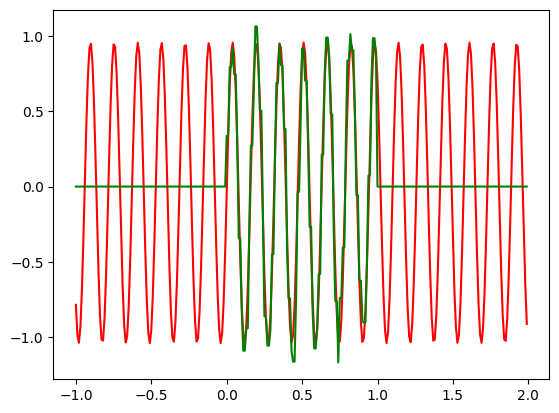

In [196]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from math import pow,sin,cos

def f(t,k=40):
    return sin(k*t)+(-1+cos(k))/k #integral of this has to be 0 should have added a constant first coef.

def mother_haar_wavelet(t):
    return 1 if 0<=t<0.5 else (-1 if 0.5<=t<1 else 0)
    
def haar(n,k,t):
    return pow(2,n/2)*mother_haar_wavelet(2**n*t-k)

def scale_down(n,k,t):
    return (t+k)/2**n

def eval(coef,t):
    return sum(sum(coef[n][k]*haar(n,k,t) for k in range(2**n)) for n in range(len(coef)))


#reuse of evaluations of f on each scale still needs to be done

def COEF(coef,nsim):
    coef_new = [[0]*2**n for n in range(len(coef))]
    for _ in range(nsim):
        for n in range(len(coef)):
            for k in range(2**n):
                u = scale_down(n,k,random())
                coef_new[n][k]+= ((f(u)-eval(coef,u))*haar(n,k,u)/2**n + coef[n][k])/nsim
            
    return coef_new
                
order = 6 # =n careful 2**n everywhere
coef = []

while len(coef)<order:
    coef.append([0]*2**(len(coef)+1))
    coef.append([0]*2**(len(coef)+1))
    coef = COEF(coef,10**2)

print(coef[0:2])
    
xs = np.arange(-1,2,0.01)
ys = [f(x) for x in xs]
zs = [eval(coef,x) for x in xs]

plt.plot(xs,ys, color ="red")
plt.plot(xs,zs, color ="green")
plt.show()


IDEA:
variable orthonomal basis (need convex type condition for optimization stuff)
with the Haar basis you get something like a Tree we think


[[-0.30386716565307526], [-0.10397345926736937, -0.08797372855903966], [6.309121151050758e-05, -0.07521841397801954, -0.030840749253236734, -0.029862112272614948], [0.00014870741164118217, -7.43537058205911e-05, -0.049453136319841204, -0.008072919452759205, -0.009524968394684644, -0.008976554469578754, -0.011688149168021845, -0.007842574995058041]]


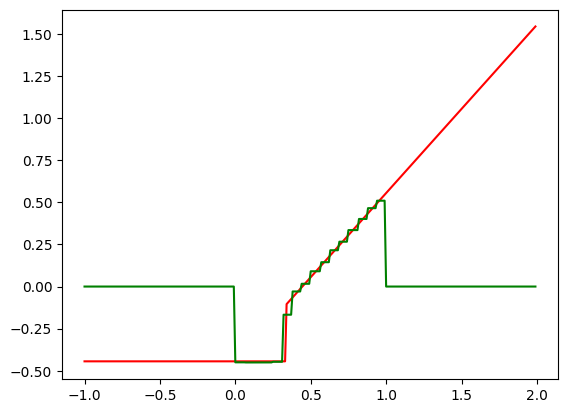

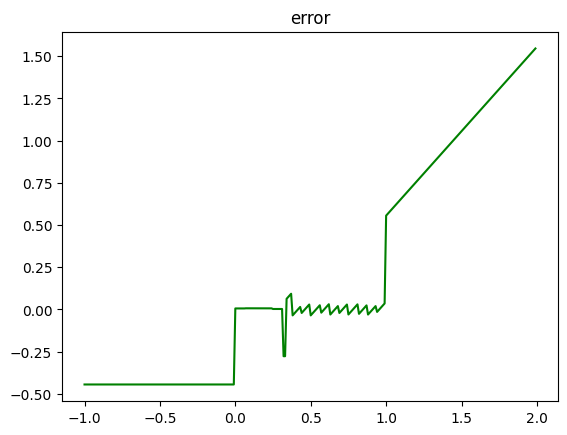

In [2]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from math import pow,sin,cos

def f(t,k = 1/3):
    tmp =  0 if t<k else t
    return tmp - (0.5 - k**2/2) 
#integral of this has to be 0 should have added a constant first coef.
def mother_haar_wavelet(t):
    return 1 if 0<=t<0.5 else (-1 if 0.5<=t<1 else 0)
    
def haar(n,k,t):
    return pow(2,n/2)*mother_haar_wavelet(2**n*t-k)

def scale_down(n,k,t):
    return (t+k)/2**n

def eval(coef,t):
    return sum(sum(coef[n][k]*haar(n,k,t) for k in range(2**n)) for n in range(len(coef)))


#reuse of evaluations of f on each scale still needs to be done

def COEF(coef,nsim):
    coef_new = [[0]*2**n for n in range(len(coef))]
    for _ in range(nsim):
        for n in range(len(coef)):
            for k in range(2**n):
                u = scale_down(n,k,random())
                coef_new[n][k]+= ((f(u)-eval(coef,u))*haar(n,k,u)/2**n + coef[n][k])/nsim
            
    return coef_new
                
order = 4 # =n careful 2**n everywhere
coef = []

while len(coef)<order:
    coef.append([0]*2**(len(coef)+1))
    coef.append([0]*2**(len(coef)+1))
    coef = COEF(coef,2*10**2)

print(coef[0:4])
    
xs = np.arange(-1,2,0.01)
ys = [f(x) for x in xs]
zs = [eval(coef,x) for x in xs]

plt.plot(xs,ys, color ="red")
plt.plot(xs,zs, color ="green")
plt.show()

xs = np.arange(-1,2,0.01)
zs = [f(x) - eval(coef,x) for x in xs]
plt.plot(xs,zs, color ="green")
plt.title("error")
plt.show()

Time taken  0.3560023307800293  seconds
[0.28826904468340975, [0.18844540302609192], [0.2849747246360142, -0.08884828219335299]]


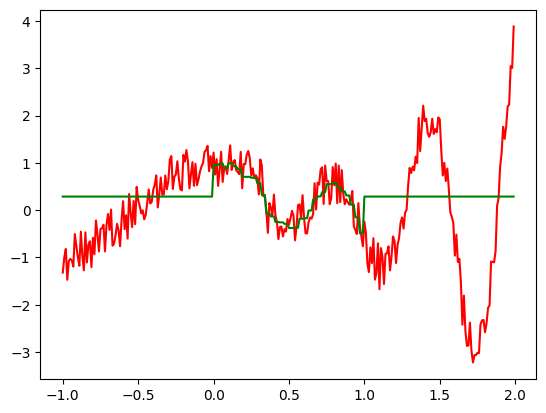

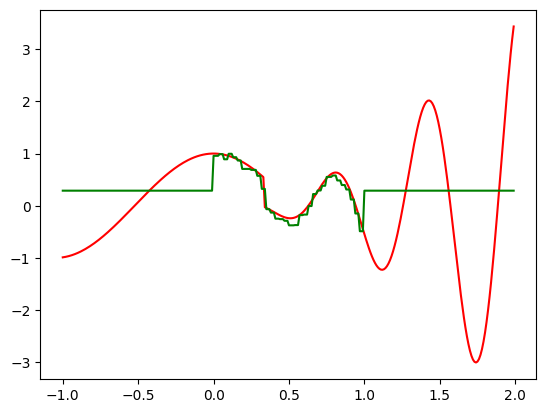

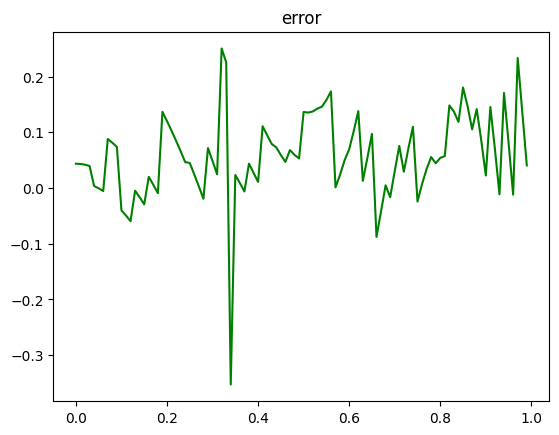

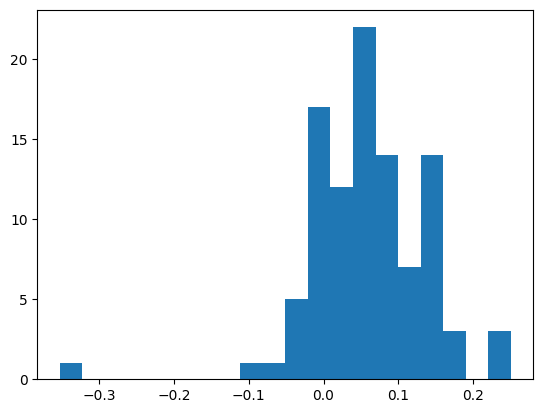

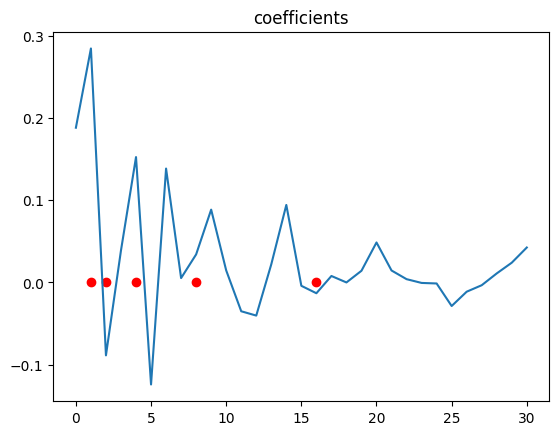

In [26]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from math import pow,sin,cos
import time

def f(t,k = 1/3,rand =True):
    return (cos(3*t) if t<k else t**2*sin(10*t)) + (random()-0.5) * (1 if rand else 0)

def mother_wavelet(t):
    return 1 if 0<=t<0.5 else (-1 if 0.5<=t<1 else 0)
    
def wavelet(n,k,t):
    return pow(2,n/2)*mother_wavelet(2**n*t-k)

def scale_down(n,k,t):
    return (t+k)/2**n

def eval(coef,t):
    return sum(sum(coef[n+1][k]*wavelet(n,k,t) for k in range(2**n)) for n in range(len(coef)-1)) + coef[0]


#reuse of evaluations of f on each scale still needs to be done

def COEF(coef,nsim):
    coef_new = [0]+[[0]*2**n for n in range(len(coef)-1)]
    for _ in range(nsim):
        coef_new[0] += ((f(random())-eval(coef,random())) + coef[0])/nsim
        for n in range(len(coef)-1):
            for k in range(2**n):
                u = scale_down(n,k,random())
                coef_new[n+1][k]+= ((f(u)-eval(coef,u))*wavelet(n,k,u)/2**n + coef[n+1][k])/nsim
            
    return coef_new
                
amount_of_reso = 5 # =n careful 2**n everywhere
coef = [0]

start = time.time()
while len(coef)<amount_of_reso+1:
    coef.append([0]*2**(len(coef)))
    coef = COEF(coef,3*10*len(coef))
end = time.time()
print('Time taken ', end-start,' seconds')

print(coef[0:3])
    
xs = np.arange(-1,2,0.01)
ys = [f(x,rand=True) for x in xs]
zs = [eval(coef,x) for x in xs]

plt.plot(xs,ys, color ="red")
plt.plot(xs,zs, color ="green")
plt.show()

xs = np.arange(-1,2,0.01)
ys = [f(x,rand=False) for x in xs]
zs = [eval(coef,x) for x in xs]

plt.plot(xs,ys, color ="red")
plt.plot(xs,zs, color ="green")
plt.show()

xs = np.arange(0,1,0.01)
zs = [f(x,rand=False) - eval(coef,x) for x in xs]
plt.plot(xs,zs, color ="green")
plt.title("error")
plt.show()

plt.hist(zs,bins=20)
plt.show()

tmp = sum(coef[1:],[])
plt.plot(range(len(tmp)),tmp)
plt.scatter([2**n for n in range(len(coef)-1)],[0]*(len(coef)-1), color = "red")
plt.title("coefficients")
plt.show()